# Energy Forecast of South Tower

## Data Cleaning and Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn import  linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import gaussian_process

In [2]:
#import data sets
df_data1 = pd.read_csv('IST_South_Tower_2017_Ene_Cons.csv')
df_data2 = pd.read_csv('IST_South_Tower_2018_Ene_Cons.csv')
df_data_all=pd.concat([df_data1,df_data2]) # combine two orginal datasets

In [3]:
# set the index to datetime and drop unused columns
df_data1['Datetime'] = pd.to_datetime(df_data1['Date_start'], dayfirst = True, errors='coerce')
df_data1 = df_data1.drop(['Date_start','Date_end','Duration','Total_Ah'], axis = 1)
df_data1 = df_data1.set_index('Datetime')
df_data2['Datetime'] = pd.to_datetime(df_data2['Date_start'], dayfirst = True, errors='coerce')
df_data2 = df_data2.drop(['Date_start','Date_end','Duration','Total_Ah'], axis = 1)
df_data2 = df_data2.set_index('Datetime')

# combine two dataframes
df_data=pd.concat([df_data1,df_data2])
df_data.head()

,Power_kW
Datetime,
2017-01-01 00:00:00,100.810001
2017-01-01 01:00:00,99.054135
2017-01-01 02:00:00,98.539567
2017-01-01 03:00:00,101.435784
2017-01-01 04:00:00,98.481665


In [4]:
df_sort_kW = df_data.sort_values(by = 'Power_kW', ascending = False) #sort the dataframe by power in descending order
print(df_sort_kW [:20]) # view first 20 entries, found there is a outlier

                       Power_kW
Datetime                       
2018-09-17 17:00:00  947.059190
2018-11-20 15:00:00  671.567397
2018-09-26 15:00:00  660.638464
2018-09-27 12:00:00  651.079090
2018-09-28 12:00:00  649.392925
2018-09-27 11:00:00  640.703836
2018-09-28 15:00:00  640.317964
2018-09-26 14:00:00  640.113886
2018-09-26 12:00:00  638.449789
2018-09-28 16:00:00  638.406090
2018-09-28 14:00:00  637.954450
2018-09-26 13:00:00  637.925389
2018-09-26 16:00:00  637.040464
2017-07-04 15:00:00  629.917364
2018-09-26 11:00:00  627.495511
2018-09-28 13:00:00  627.419036
2018-09-17 16:00:00  621.344736
2018-09-26 17:00:00  619.261775
2018-03-07 13:00:00  618.023536
2017-07-04 16:00:00  615.739992


In [5]:
df_sort_kW = df_data.sort_values(by = 'Power_kW', ascending = True) #sort the dataframe by power in ascending order
print(df_sort_kW [:20]) # view first 20 entries, found there are a lot of zero values

                     Power_kW
Datetime                     
2018-10-22 16:00:00       0.0
2018-10-22 07:00:00       0.0
2018-10-22 08:00:00       0.0
2018-10-22 09:00:00       0.0
2018-10-22 10:00:00       0.0
2018-10-22 11:00:00       0.0
2018-10-22 12:00:00       0.0
2018-10-22 13:00:00       0.0
2018-10-22 14:00:00       0.0
2018-10-22 06:00:00       0.0
2018-10-22 15:00:00       0.0
2018-10-22 17:00:00       0.0
2018-10-22 18:00:00       0.0
2018-10-22 19:00:00       0.0
2018-10-22 20:00:00       0.0
2018-10-22 21:00:00       0.0
2018-10-22 22:00:00       0.0
2018-10-22 23:00:00       0.0
2018-10-23 00:00:00       0.0
2018-10-21 06:00:00       0.0


In [6]:

# replace the outlier and zero values by the values of previous year
for i in range(len(df_data)):
    if df_data['Power_kW'][i] == 0:
        df_data['Power_kW'][i] = df_data['Power_kW'][i-8760] # replace the missing values by using the values from previous year
    if df_data['Power_kW'][i] > 900:
        df_data['Power_kW'][i] = (df_data['Power_kW'][i-1]+df_data['Power_kW'][i+1])/2 # replace the outlier by the average of its neighbors              
print(df_data.describe())


           Power_kW
count  17520.000000
mean     176.626674
std      113.232846
min       25.504849
25%      100.773402
50%      111.711839
75%      243.113096
max      671.567397


## Exploratory Data Analysis 

Text(0.5, 1.0, 'Histogram of hourly power consumption')

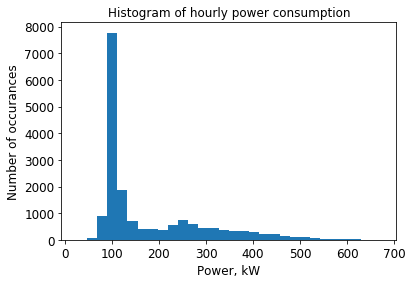

In [7]:
# Histogram of Power data
num_bins = 30 # Num_Bins - the number of bins that your data will be divided into.
plt.hist(df_data['Power_kW'], num_bins)

# create axes labels and title
plt.xlabel ("Power, kW", fontsize = 12)  
plt.ylabel ("Number of occurances", fontsize = 12)
plt.xticks (fontsize = 12)
plt.yticks (fontsize = 12)
plt.title ('Histogram of hourly power consumption')

<function matplotlib.pyplot.show(*args, **kw)>

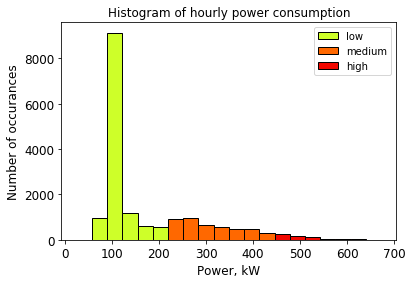

In [8]:
# Define the core components
data, bins, patches = plt.hist (df_data['Power_kW'], 20, ec = 'k') 
    # ec = 'k' - color of the outline of histogram bars

cmap = plt.get_cmap('jet') # specify the color pallet
low = cmap (0.6) # specify the color for low values
medium = cmap (0.8) # specify the color for medium values
high = cmap (0.9) # specify the color for high values

for i in range(0,6): # choose the bins of low range
    patches[i].set_facecolor(low)
for i in range(6,13): 
    patches[i].set_facecolor(medium)
for i in range(13,20):
    patches[i].set_facecolor(high)
    
# Create legend
from matplotlib.patches import Rectangle
handles = [Rectangle ((0,0), 1, 1, color = c, ec = "k") for c in [low, medium, high]]
labels = ["low","medium", "high"]
plt.legend (handles, labels)

# create axes labels and title
plt.xlabel ("Power, kW", fontsize = 12)  
plt.ylabel ("Number of occurances", fontsize = 12)
plt.xticks (fontsize = 12)
plt.yticks (fontsize = 12)

plt.title ('Histogram of hourly power consumption')

plt.show # to view the plot

In [9]:
# Prepare packages and data
import matplotlib.ticker as ticker # import a special package

df_plot_time = df_data.copy (deep = True) # create a copy
df_plot_time['Date']=df_plot_time.index # make a new column as date
df_plot_time.head() # check how it looks now

,Power_kW,Date
Datetime,,
2017-01-01 00:00:00,100.810001,2017-01-01 00:00:00
2017-01-01 01:00:00,99.054135,2017-01-01 01:00:00
2017-01-01 02:00:00,98.539567,2017-01-01 02:00:00
2017-01-01 03:00:00,101.435784,2017-01-01 03:00:00
2017-01-01 04:00:00,98.481665,2017-01-01 04:00:00


Text(0.5, 1.0, 'Hourly power consumption in a selected time')

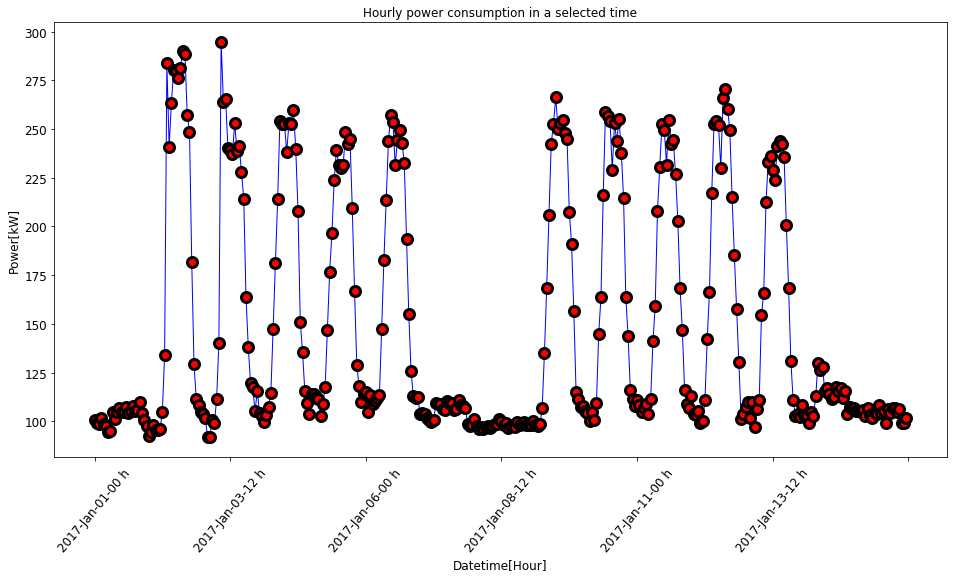

In [10]:
# plot selected times
# Define the core components

fig, ax = plt.subplots() # create objects of the plot (figure and plot inside)
fig.set_size_inches(16,8) # define figure size

ax.xaxis.set_major_locator (ticker.MultipleLocator(60)) # define the interval between ticks on x axis 
ax.xaxis.set_tick_params (which = 'major', pad = 5, labelrotation = 50)

# Define the time interval to plot:
plot_start = '2017-01-01 00:00:00' 
plot_end = '2017-01-15 23:00:00'

# Create a list of labels:
s = df_plot_time ['Date'] [plot_start : plot_end]
b = s.dt.strftime ('%Y-%b-%d-%H h') # year-month(in words)-day-hour

y2017 = df_plot_time ['Power_kW'][plot_start : plot_end] # select data slice

# Plot:
plt.plot (b, y2017, '-o', color = 'blue', # x axis laels; data; symbol type *try '-p'; line color;
         markersize = 10, linewidth = 1, # point size; line thickness;
         markerfacecolor = 'red', # color inside the point
         markeredgecolor = 'black', # color of edge
         markeredgewidth = 3)
plt.xlabel ("Datetime[Hour]", fontsize = 12)  # create axes labels
plt.ylabel ("Power[kW]", fontsize = 12)
plt.xticks (fontsize = 12)
plt.yticks (fontsize = 12)
plt.title ('Hourly power consumption in a selected time') #create title

Text(0.5, 1.0, 'Hourly power consumption in a selected time[two years]')

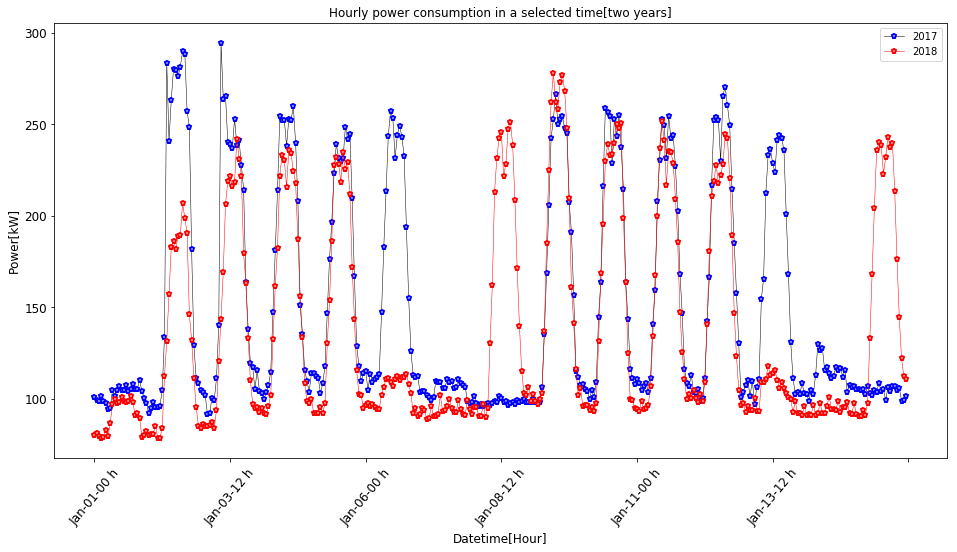

In [11]:
# Plotting data by time - two years

fig, ax = plt.subplots()
fig.set_size_inches(16,8) # define figure size

ax.xaxis.set_major_locator (ticker.MultipleLocator(60))
ax.xaxis.set_tick_params(which = 'major', pad = 5, labelrotation = 50)

# First year slice
plot_start1 = '2017-01-01 00:00:00'
plot_end1 = '2017-01-15 23:00:00'

# Second year slice
plot_start2 = '2018-01-01 00:00:00'
plot_end2 = '2018-01-15 23:00:00'

s = df_plot_time ['Date'] [plot_start1 : plot_end1]
b = s.dt.strftime ('%b-%d-%H h')

# Select and Plot each year:
y2017 = df_plot_time ['Power_kW'][plot_start1 : plot_end1]
y2018 = df_plot_time ['Power_kW'][plot_start2 : plot_end2]

plt.plot (b, y2017, '-p', color = 'black',
         markersize = 5, linewidth = 0.5,
         markerfacecolor = 'white',
         markeredgecolor = 'blue',
         markeredgewidth = 2,
         label = '2017')

plt.plot(b, y2018, '-p', color = 'red',
         markersize=5, linewidth=0.5,
         markerfacecolor='white',
         markeredgecolor='red',
         markeredgewidth=2,
         label = '2018')

# create axes labels and title
plt.xlabel ("Datetime[Hour]", fontsize = 12)  
plt.ylabel ("Power[kW]", fontsize = 12)
plt.xticks (fontsize = 12)
plt.yticks (fontsize = 12)
plt.legend()
plt.title ('Hourly power consumption in a selected time[two years]')

In [12]:
#heat map
def plot_save_heatmap (df, title_suffix, col_name, y_labels, x_labels, n_reshape, title):
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    data = df[col_name].values # extract values from selected column
    padding_length = n_reshape - len (data) %n_reshape # missing data points for the filled matrix
    data = np.append (data, np.array ([0] * padding_length)) # add missing data points by padding file to reshape with 0. 
    data_shaped = data.reshape ((len(data) // n_reshape, n_reshape)) # reshape to the full matrix

    y_ticks = data_shaped.shape[0] # get number of yTicks from number of rows (0), or columns - (1)
    min_value = min(data) # min value for colorbar
    max_value = max(data) # max value for colorbar

    fig = plt.figure (figsize = (20,20)) # create and size the figure
    ax = plt.gca() # create an axes instance 
    im = ax.imshow (data_shaped, vmin = min_value, vmax = max_value, aspect = 'auto', origin = 'upper', cmap = 'magma') # create actual plot
    divider = make_axes_locatable (ax) # create a pointer to the legend
    cax = divider.append_axes ("right", size = "3%", pad = 0.2) # specify visual features of legend 
    
    ax.set_title (title + title_suffix, fontdict = {'fontsize':28}) # create plot titles
    ax.set_yticks (range (0, y_ticks, 4)) # create y_ticks every 4 values
    ax.set_yticklabels (labels = y_labels, fontsize = 14) # use list of y_labels created outside function to label y_ticks

    x_interval = n_reshape // len(x_labels) # calculate distance between xticks to match x_labels created outside function
    ax.set_xticks (range (0, n_reshape, x_interval)) # create x_ticks every xInterval values
    ax.set_xticklabels (labels = x_labels, fontsize = 14, rotation = 45, horizontalalignment = 'right')# use labels, make them tilted, make the right end of the label align with the x-axis 

    plt.colorbar(im, cax = cax) # create colorbar legend
    

In [13]:
# Prepare the dataset
df_heatmap = df_data.copy (deep=True)
df_heatmap['Date']=df_heatmap.index
df_heatmap ['WeekDay'] = df_heatmap.index.day_name() # create a new column and fill it with names of days
df_heatmap = df_heatmap.iloc[24:,:]# We want the Heat Map to start on Monday


In [14]:
# Create labels for X axis
s0 = df_heatmap['WeekDay'].unique().tolist()
s1 = np.repeat(s0, 4) # repeats each element before moving to the next: [Wed, Wed, Wed, etc]
s2 = [' 12 AM ', ' 6 AM', ' 12 PM', ' 6 PM'] # label xTicks every 6 hours
s3 = np.tile(s2, 7) # repeats all elements conserving their order: '12AM ', '6AM', '12PM', '6PM' , '12AM ', '6AM', '12PM', '6PM'
x_names = np.char.add(s1, s3) # creates combination of previous sequences: Mon + 6AM

# Create labels for Y axis
y_start = df_heatmap.index.values [0] # get 1st date from dataframe
y_end =  df_heatmap.index.values [-1] # get last date from dataframe
y_tickLabels = pd.DataFrame (data = pd.date_range (start = y_start, end = y_end, freq = '4W'), columns = ['datetime']) # create sequence of ylabels from start and end date 
y_tickLabels['date'] = y_tickLabels['datetime'].apply (lambda x: x.strftime('%Y-%m-%d')) # set format of labels
y_names = y_tickLabels['date'].tolist() # create list from created names

# Automate the creation of rows, hourly averaged, and daily averaged data and plots
n_reshape = [24 * 7, 7] 
x_names = [x_names, s0]
title_suffixes = ['_Hourly_mean', '_Daily_mean']
dfs = [df_heatmap.resample('H', level = 0).mean(),df_heatmap.resample('D', level = 0).mean()]


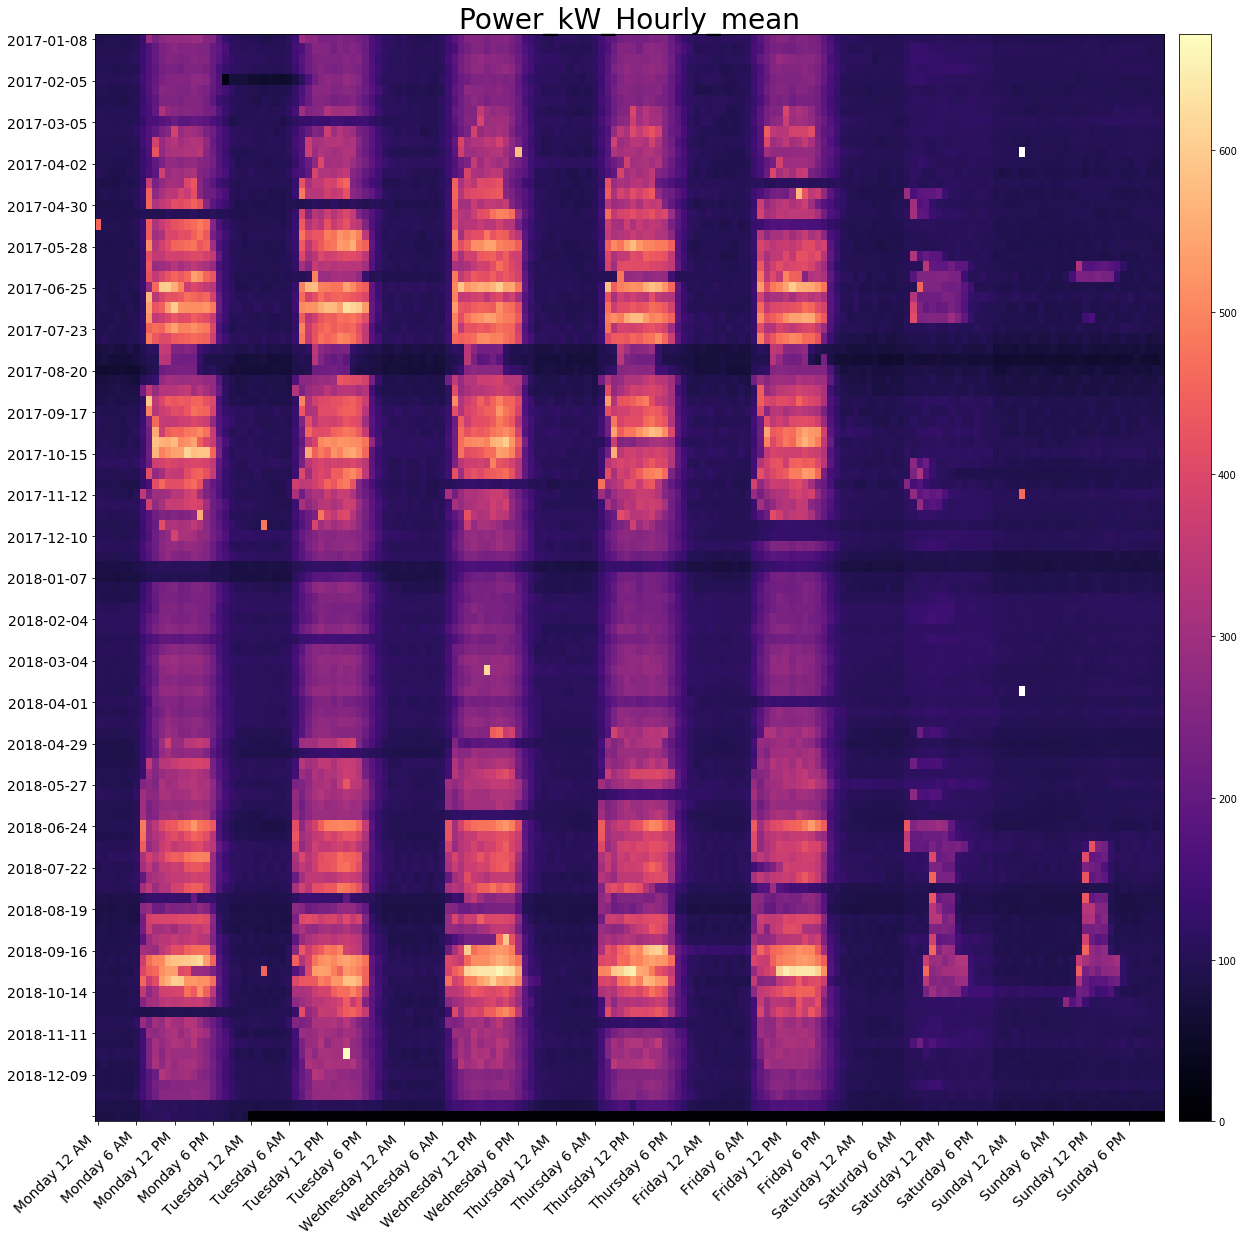

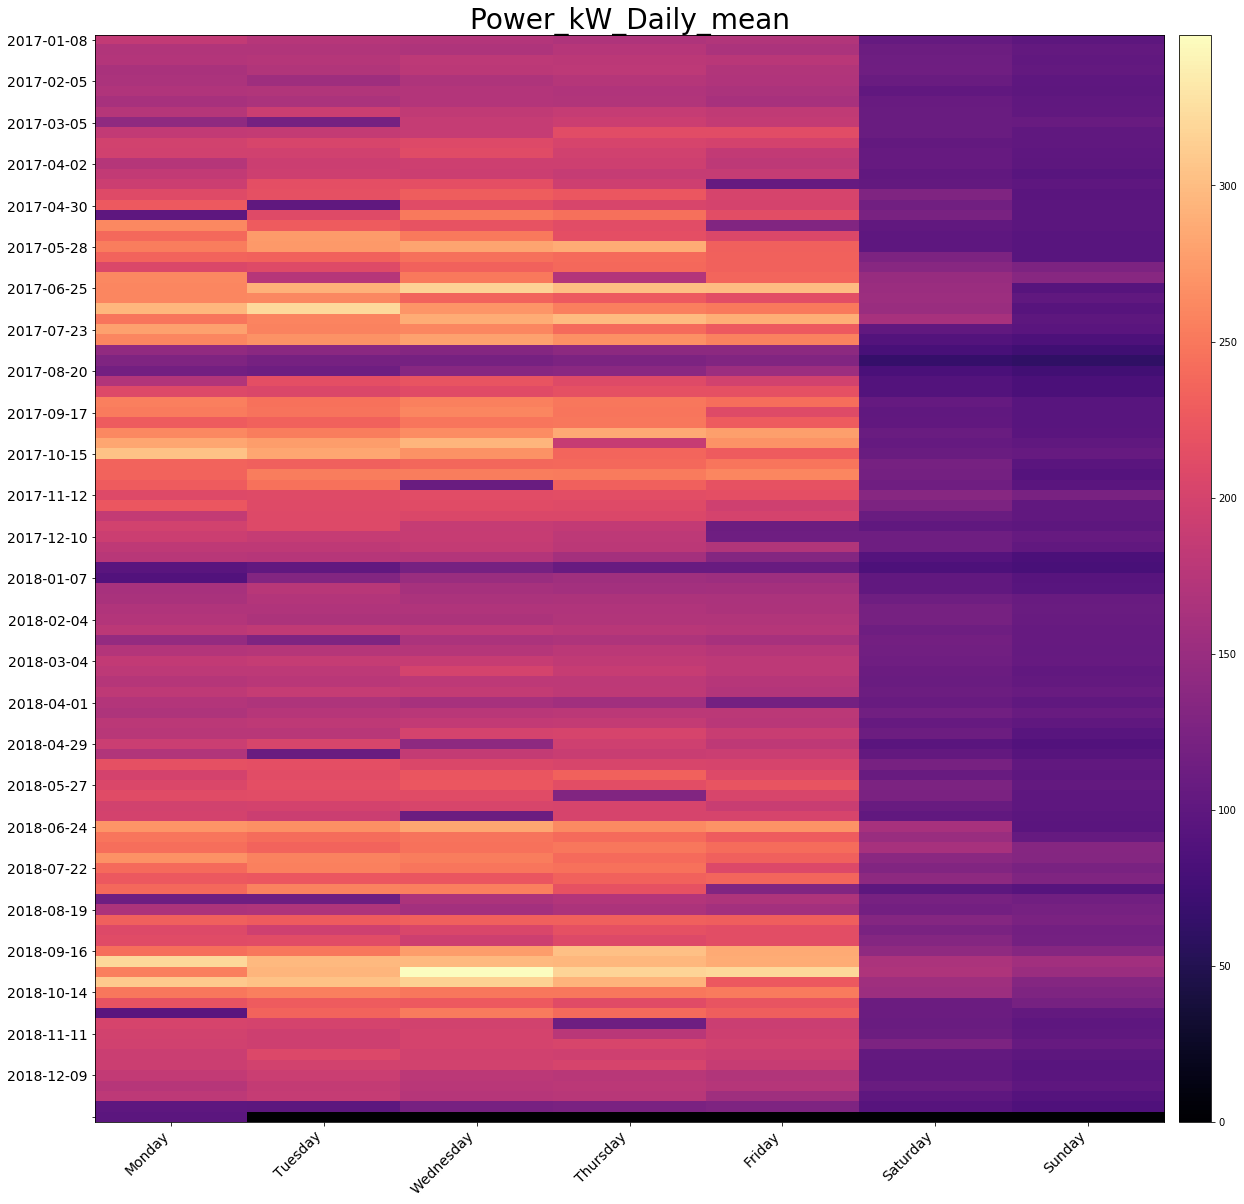

In [15]:
# Execute Heat Map:

for j in range(len(n_reshape)): 
    for i in dfs[j].columns.tolist():
        plot_save_heatmap(df = dfs[j], title_suffix = title_suffixes[j], col_name = i, y_labels = y_names, x_labels = x_names[j], \
                          n_reshape = n_reshape[j], title = i)

## Clustering 

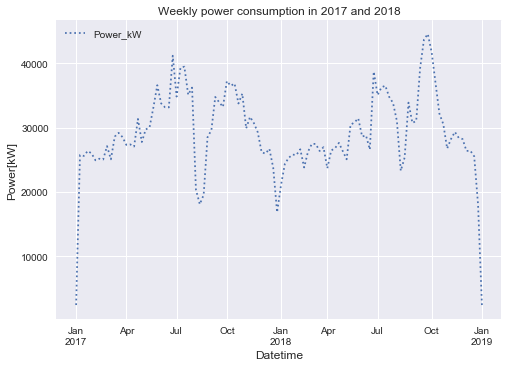

In [16]:
# define plot style
plt.style.use('seaborn')
data_weekly = df_data.resample('W').sum() # resample data by week
data_weekly.plot(style = [':', '--', '-'])
plt.xlabel ("Datetime", fontsize = 12)  # create axes labels
plt.ylabel ("Power[kW]", fontsize = 12)
plt.title ('Weekly power consumption in 2017 and 2018')
plt.show()

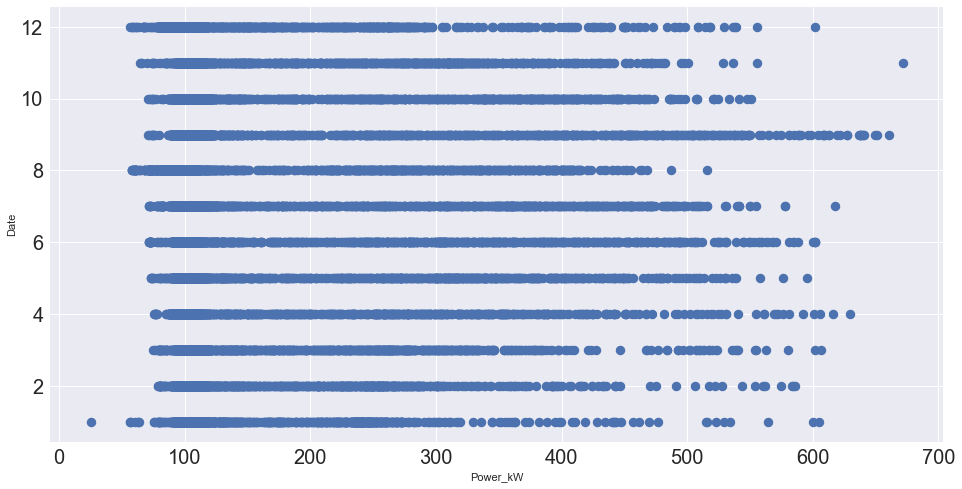

In [17]:

df_data_all['Power_kW'] = np.array(df_data['Power_kW']) # using the cleaned power data

df_data_all.rename(columns={'Date_start':'Date'},inplace=True) #rename the columns to date
mon = df_data_all['Date'] #create auxiliary variable 'mon' with the Date column of df_data_all (all_data)
temp = pd.DatetimeIndex (mon) #create auxiliary variable "temp" wich uses date as index in the auxiliary variable "mon"
month = pd.Series(temp.month) #create a auxiliary variable "month" with is a vector with the month of the "temp" variable

#drop all the columns exfept Power from the df_data and create a new auxiliary variable to_be_plotted
to_be_plotted = df_data_all.drop(['Date', 'Date_end', 'Duration', 'Total_Ah'], axis = 1)
# join the variable month to the "to_be_plotted" variable
to_be_plotted = to_be_plotted.join(month)
# do a scatter plot of the to_be_plotted variable
to_be_plotted.plot.scatter(x = 'Power_kW', y = 'Date', figsize = (16,8), linewidth = 5, fontsize = 20)

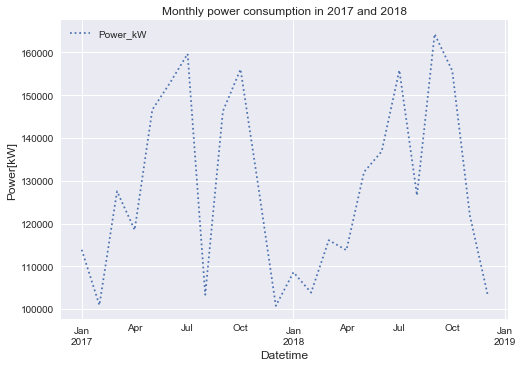

In [18]:
df_data_monthly = df_data.resample('M').sum() # resample by monthly
df_data_monthly.plot(style = [':', '--', '-'])
plt.xlabel ("Datetime", fontsize = 12)  # create axes labels
plt.ylabel ("Power[kW]", fontsize = 12)
plt.title ('Monthly power consumption in 2017 and 2018')
plt.show()

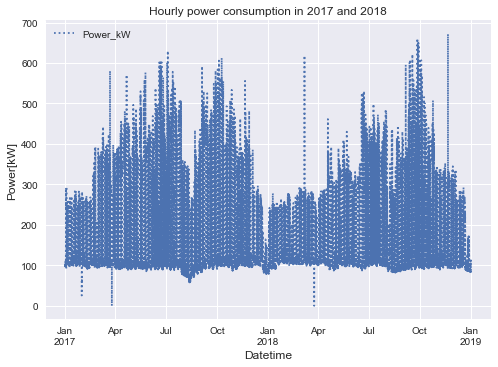

In [19]:
df_data_hourly = df_data.resample('H').sum() # resample by hourly
df_data_hourly.plot(style = [':', '--', '-'])
plt.xlabel ("Datetime", fontsize = 12)  # create axes labels
plt.ylabel ("Power[kW]", fontsize = 12)
plt.title ('Hourly power consumption in 2017 and 2018')
plt.show()

In [20]:
df_data_hourly['hour'] = df_data_hourly.index.hour  # create a new column 'hour' from hourly index component

df_data_hourly.index = df_data_hourly.index.date # remove hourly component from index

df_data_pivot = df_data_hourly.pivot(columns = 'hour') # organize df by entries in column 'hour'


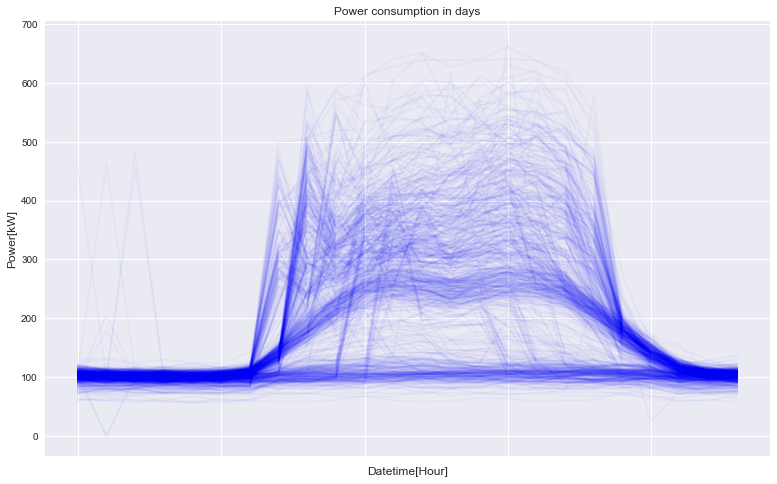

In [21]:
df_data_pivot = df_data_pivot.dropna()  # delete NaNs
df_data_pivot.T.plot(figsize = (13,8), legend = False, color = 'blue', alpha = 0.03)# alpha - thickness of line
plt.xlabel ("Datetime[Hour]", fontsize = 12)  # create axes labels
plt.ylabel ("Power[kW]", fontsize = 12)
plt.title ('Power consumption in days')
plt.show()

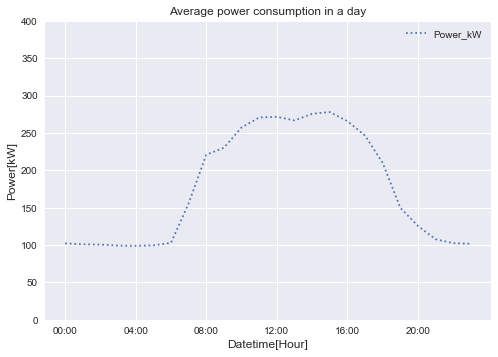

In [22]:
#Average day
by_time = df_data.groupby(df_data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6) #create 6 ticks
by_time.plot(xticks = hourly_ticks, style = [':', '--', '-'])
plt.ylim((0,400)) # set the y axes limit to compare it with plot above
plt.xlabel ("Datetime[Hour]", fontsize = 12)  # create axes labels
plt.ylabel ("Power[kW]", fontsize = 12)
plt.title ('Average power consumption in a day')
plt.show()

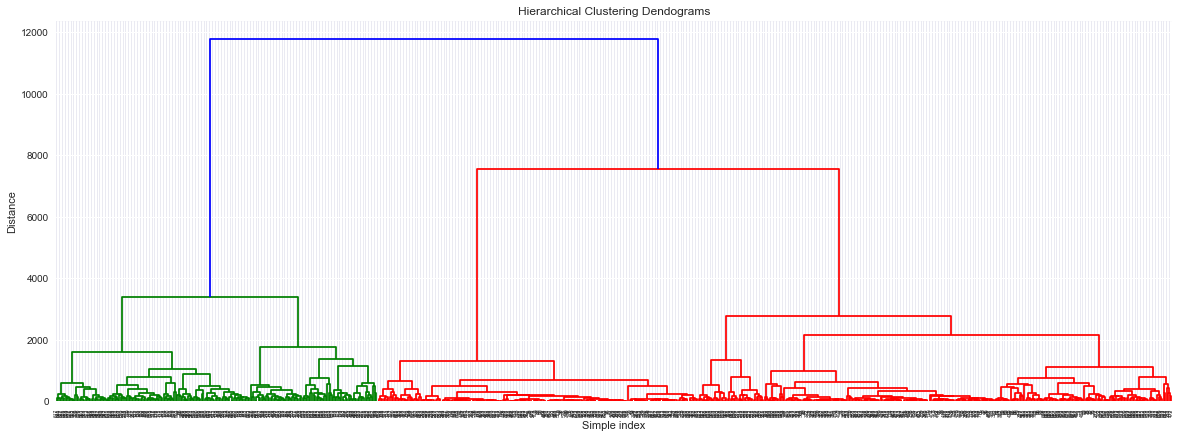

In [23]:
#Hierarchical clustering with Dynamic Time Warping

#Dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 7))  
plt.title("Hierarchical Clustering Dendograms") 
plt.xlabel('Simple index')
plt.ylabel('Distance')
dend = shc.dendrogram(shc.linkage(df_data_pivot, method = 'ward')) 

In [24]:
# Clustering with k-means 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [25]:
#normalize data
df_data_hourly_normalized=df_data_hourly
df_data_hourly_normalized['normalized']=df_data_hourly_normalized['Power_kW']
X=df_data_hourly_normalized.as_matrix(df_data_hourly_normalized.columns[0:])
sc = MinMaxScaler()
X=sc.fit_transform(X)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


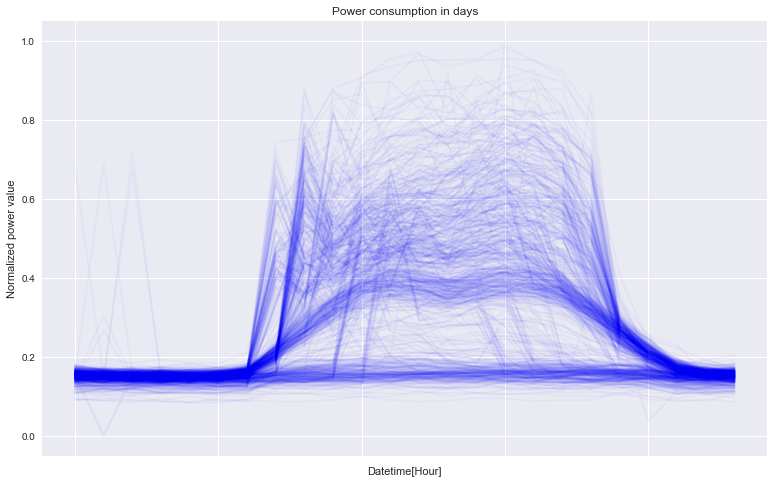

In [26]:
df_data_hourly_normalized['normalized']=X

df_data_hourly_normalized = df_data_hourly_normalized.drop (['Power_kW'], axis = 1) # remove column 'Power_kW'

df_data_pivot_normalized = df_data_hourly_normalized.pivot(columns = 'hour') # organize df by entries in column 'hour'

df_data_pivot_normalized = df_data_pivot_normalized.dropna() # delete NaNs

df_data_pivot_normalized.T.plot(figsize = (13,8), legend = False, color = 'blue', alpha = 0.03)
plt.title("Power consumption in days") 
plt.xlabel('Datetime[Hour]')
plt.ylabel('Normalized power value')
plt.show()

In [27]:
# Prepare clustering
XX = df_data_pivot_normalized.values.copy()# copy dataframe
silhouette_scores = []
    
#Prepare a list with indexes
n_cluster_list = np.arange(2,31).astype(int) # range of possible clusters from 2 to 30

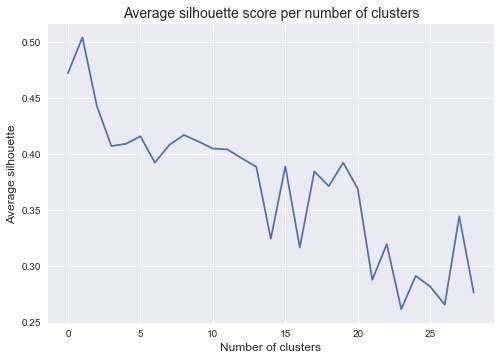

In [28]:
# applying k-means for different k clusters 
for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(XX)
    silhouette_scores.append(silhouette_score(XX, kmeans.labels_))

plt.xlabel ("Number of clusters", fontsize = 12)  # create axes labels
plt.ylabel ("Average silhouette", fontsize = 12)
plt.title ('Average silhouette score per number of clusters', fontsize = 14)

plt.plot(silhouette_scores)

In [29]:
print(silhouette_scores)

[0.47198731460312016, 0.5038605498313462, 0.4426768408248983, 0.4071521423051173, 0.40908704731419443, 0.41586599618167996, 0.39240749583597045, 0.40818027957494546, 0.41701094430505325, 0.4111976240508934, 0.40490813416724014, 0.4041332033880564, 0.3962200449108772, 0.3886956992701647, 0.3246378324439862, 0.3890468453151366, 0.31680176424854367, 0.38451936167659784, 0.3714736561552437, 0.39240698507476934, 0.3689510052608422, 0.2881147110754796, 0.31970384731239765, 0.2618883387565115, 0.2915968690372732, 0.2819603478165917, 0.26597569053649833, 0.3445939261532285, 0.27656573314727373]


In [30]:
# Add a column called cluster wich indicates the clsuster that each point belongs to
kmeans = KMeans(n_clusters = 3)
cluster_found = kmeans.fit_predict(XX)
cluster_found_sr = pd.Series(cluster_found, name = 'cluster')
df_data_pivot = df_data_pivot.set_index(cluster_found_sr, append = True )

df_data_pivot.head()

Power_kW                                      \
hour                        0           1           2           3    
           cluster                                                   
2017-01-01 1        100.810001   99.054135   98.539567  101.435784   
2017-01-02 2         92.215521   94.693530   97.909850   95.432934   
2017-01-03 2        103.791652  101.907308   91.747931   92.043999   
2017-01-04 2        115.529472  104.092526  102.907601   99.679700   
2017-01-05 2        113.875645  113.996694  112.396181  111.547965   

                                                                    \
hour                        4           5           6           7    
           cluster                                                   
2017-01-01 1         98.481665   97.805844   94.464760   94.983261   
2017-01-02 2         95.678309   96.260175  104.752833  133.987914   
2017-01-03 2        100.451661   99.002787  111.190935  140.103948   
2017-01-04 2        103.385460  107.459174  114.599536  147.442271   
2017-01-05 2        102.830689  108.672723  117.625760  146.875263   

                                               ...                  \
hour                        8           9      ...              14   
           cluster                             ...                   
2017-01-01 1        104.622170  101.362150     ...      107.381825   
2017-01-02 2        283.762017  240.998945     ...      281.572429   
2017-01-03 2        294.723725  263.701751     ...      253.037640   
2017-01-04 2        181.333150  214.044129     ...      253.200640   
2017-01-05 2        176.543630  196.504260     ...      231.478900   

                                                                    \
hour                        15          16          17          18   
           cluster                                                   
2017-01-01 1        103.988083  105.216053  107.873450  105.297772   
2017-01-02 2        289.854890  288.749498  257.061535  248.644479   
2017-01-03 2        238.712342  241.225748  227.866440  214.317254   
2017-01-04 2        252.589715  259.785575  239.788455  208.143100   
2017-01-05 2        248.707188  242.141700  244.740102  209.591974   

                                                                                
hour                        19          20          21          22          23  
           cluster                                                              
2017-01-01 1        105.531785  110.062383  104.160698  100.433525   97.656390  
2017-01-02 2        181.613485  129.322284  111.230047  108.547085  104.681821  
2017-01-03 2        163.726639  138.194040  119.654314  117.374485  105.088449  
2017-01-04 2        151.066749  135.600663  115.702961  109.540605  103.842999  
2017-01-05 2        167.010475  129.060958  117.928383  109.639585  113.762462  

[5 rows x 24 columns]

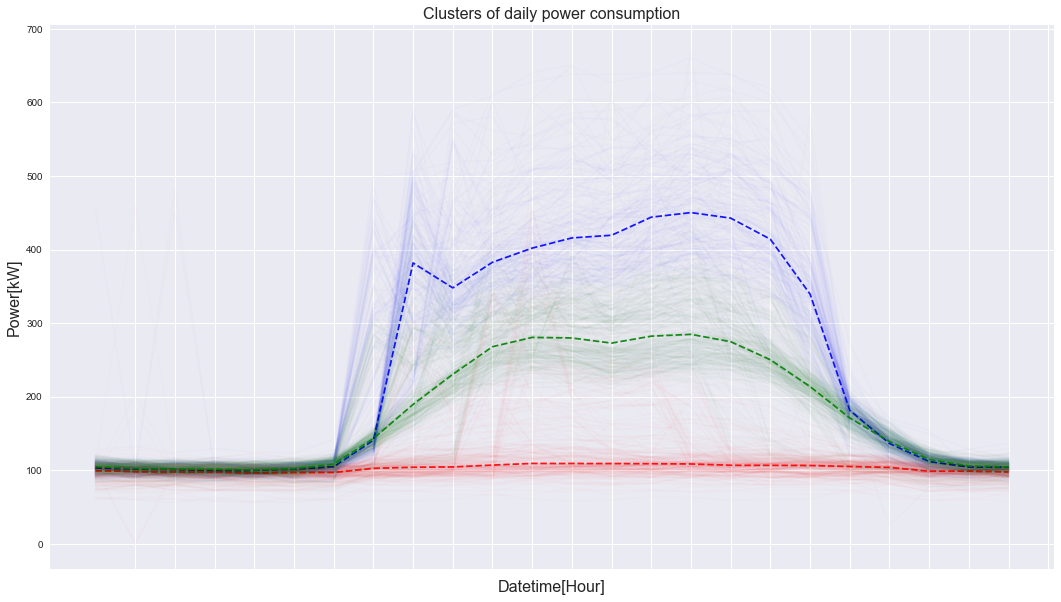

In [31]:
# plot clusters
fig, ax = plt.subplots(1,1, figsize=(18,10))
color_list = ['blue','red','green']
cluster_values = sorted(df_data_pivot.index.get_level_values('cluster').unique())
for cluster, color in zip(cluster_values, color_list):
    df_data_pivot.xs(cluster, level=1).T.plot(
        ax=ax, legend=False, alpha=0.01, color=color, label= f'Cluster {cluster}'
        )
    df_data_pivot.xs(cluster, level=1).median().plot(
        ax=ax, color=color, alpha=0.9, ls='--'
    )

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('Power[kW]',fontsize = 16)
ax.set_xlabel('Datetime[Hour]',fontsize = 16)
ax.set_title('Clusters of daily power consumption',fontsize = 16)
plt.show()

## Feature Selection 

In [32]:
# import weather information
df_weather = pd.read_csv('emaIST_2017_2018_2019.csv') # Renamed the dat.file to csv.file
df_weather.head()

,yyyy-mm-dd hh:mm:ss,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
0,2017-01-01 00:00:00,8.72,74.6,2.138,3.774,1029,1.163,0.0,0.0
1,2017-01-01 00:05:00,8.68,74.6,1.929,3.019,1029,1.496,0.0,0.0
2,2017-01-01 00:10:00,8.69,74.5,1.824,2.516,1029,1.025,0.0,0.0
3,2017-01-01 00:15:00,8.62,75.1,2.264,3.271,1029,1.690,0.0,0.0
4,2017-01-01 00:20:00,8.63,75.0,3.061,3.774,1029,1.108,0.0,0.0


In [33]:
# set the index to datetime and drop unused columns
df_weather['Datetime'] = pd.to_datetime(df_weather['yyyy-mm-dd hh:mm:ss'])
df_weather = df_weather.set_index('Datetime')
df_weather = df_weather.drop(['yyyy-mm-dd hh:mm:ss'], axis = 1)
df_weather.head()

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
Datetime,,,,,,,,
2017-01-01 00:00:00,8.72,74.6,2.138,3.774,1029,1.163,0.0,0.0
2017-01-01 00:05:00,8.68,74.6,1.929,3.019,1029,1.496,0.0,0.0
2017-01-01 00:10:00,8.69,74.5,1.824,2.516,1029,1.025,0.0,0.0
2017-01-01 00:15:00,8.62,75.1,2.264,3.271,1029,1.690,0.0,0.0
2017-01-01 00:20:00,8.63,75.0,3.061,3.774,1029,1.108,0.0,0.0


In [34]:
df_weather_hourly =  df_weather.resample('H').mean() # resample the data by hour and get the hourly average value
df_weather_hourly.head()

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
Datetime,,,,,,,,
2017-01-01 00:00:00,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083,0.0,0.0
2017-01-01 01:00:00,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,0.0,0.0
2017-01-01 02:00:00,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,0.0,0.0
2017-01-01 03:00:00,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,0.0,0.0
2017-01-01 04:00:00,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000,0.0,0.0


In [35]:
# merge the weather data with the power consumption data
df_data_weather = df_data.merge(df_weather_hourly,left_index=True,right_index=True)
df_data_weather.tail()

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
Datetime,,,,,,,,,
2018-12-31 19:00:00,97.217861,13.361667,54.013333,0.0,0.0,1031.0,1.112333,0.0,0.0
2018-12-31 20:00:00,95.928710,12.810000,55.441667,0.0,0.0,1031.0,1.322417,0.0,0.0
2018-12-31 21:00:00,85.652000,12.565000,55.291667,0.0,0.0,1031.0,1.195500,0.0,0.0
2018-12-31 22:00:00,90.360675,11.926667,56.530000,0.0,0.0,1031.0,1.117000,0.0,0.0
2018-12-31 23:00:00,81.954980,11.338571,58.050000,0.0,0.0,1031.0,1.388643,0.0,0.0


In [36]:
# in this file, holidays mean the national holidays as well as the days there is no class(not include weekends).
df_holiday=pd.read_csv('holiday.csv')# import holiday info
df_holiday['Datetime']=pd.to_datetime(df_holiday['Date'],dayfirst = True, errors='coerce') # convert to datetime
df_holiday = df_holiday.set_index('Datetime') # set datetime as index
df_holiday = df_holiday.drop(['Date'], axis = 1) # drop unused column 'date'
df_holiday=df_holiday.iloc[:,:1] # delete other unrelated columns
df_holiday.head()

,holiday
Datetime,
2017-01-01 00:00:00,1
2017-01-01 01:00:00,1
2017-01-01 02:00:00,1
2017-01-01 03:00:00,1
2017-01-01 04:00:00,1


In [37]:
df_all_data = df_data_weather.merge(df_holiday,left_index=True,right_index=True) # combine weather info and holiday info
df_all_data.head()

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,holiday
Datetime,,,,,,,,,,
2017-01-01 00:00:00,100.810001,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083,0.0,0.0,1
2017-01-01 01:00:00,99.054135,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,0.0,0.0,1
2017-01-01 02:00:00,98.539567,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,0.0,0.0,1
2017-01-01 03:00:00,101.435784,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,0.0,0.0,1
2017-01-01 04:00:00,98.481665,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000,0.0,0.0,1


In [38]:
# create features
df_all_data['hour'] = df_all_data.index.hour #hour
df_all_data['month']=df_all_data.index.month #month
df_all_data['weekday']=df_all_data.index.weekday #weekday
df_all_data['Power_kW-1']=df_all_data.Power_kW.shift(1) #power-1
df_all_data['Power_kW-2']=df_all_data.Power_kW.shift(2)
df_all_data['Power_kW-3']=df_all_data.Power_kW.shift(3)
df_all_data['logPower']=np.log(df_all_data['Power_kW-1']) #logpower
df_all_data['SqrtPower']=np.sqrt(df_all_data['Power_kW-1']) #sqrtpower
df_all_data=df_all_data.dropna()
# create a feature which is the average power consumption of previous three hours
df_all_data['Avg_Power_3']=(df_all_data['Power_kW-1']+df_all_data['Power_kW-2']+df_all_data['Power_kW-3'])/3
df_all_data.head()

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,holiday,hour,month,weekday,Power_kW-1,Power_kW-2,Power_kW-3,logPower,SqrtPower,Avg_Power_3
Datetime,,,,,,,,,,,,,,,,,,,
2017-01-01 03:00:00,101.435784,6.831333,81.333333,3.534333,4.423583,1028.0,1.542000,0.0,0.0,1,3,1,6,98.539567,99.054135,100.810001,4.590458,9.926710,99.467901
2017-01-01 04:00:00,98.481665,6.500250,81.241667,4.006000,5.262333,1028.0,0.891000,0.0,0.0,1,4,1,6,101.435784,98.539567,99.054135,4.619426,10.071533,99.676495
2017-01-01 05:00:00,97.805844,6.006417,81.008333,4.552833,6.079333,1028.0,1.375833,0.0,0.0,1,5,1,6,98.481665,101.435784,98.539567,4.589870,9.923793,99.485672
2017-01-01 06:00:00,94.464760,5.645833,80.441667,4.004417,5.346417,1027.0,0.988000,0.0,0.0,1,6,1,6,97.805844,98.481665,101.435784,4.582984,9.889684,99.241098
2017-01-01 07:00:00,94.983261,5.477750,80.191667,3.176250,4.654167,1027.0,1.466167,0.0,0.0,1,7,1,6,94.464760,97.805844,98.481665,4.548227,9.719298,96.917423


In [39]:
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn import  linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import gaussian_process
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

In [40]:
# recurrent
X=df_all_data.values
Y=X[:,0]
X=X[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
#Y = np.array(Y, dtype=int) # convert the data into integer, otherwise there will be errors
#model = ExtraTreesClassifier() # this one needs to convert Y data into integer
model = ExtraTreesRegressor()
model.fit(X, Y)
print(model.feature_importances_)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.01568098 0.00528956 0.00422086 0.00402728 0.00497573 0.02167303
 0.00097414 0.00111986 0.00171377 0.05836418 0.01259754 0.00936225
 0.25746192 0.0632947  0.01637934 0.2637887  0.15100086 0.10807528]


In [41]:
# Feature Selection
# Filter Methods 
# kBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [42]:
Y = np.array(Y, dtype=int) # convert the data into integer, just for feature selection
features=SelectKBest(k=6) # Test different k number of features
featureschi2=SelectKBest(k=6,score_func=chi2) # chi is the score function
fit=features.fit(X,Y)
fit2=featureschi2.fit(X,Y)
print(fit.scores_)
print(fit2.scores_)
features_results=fit2.transform(X)
print(features_results)

[  9.52493731   5.25050368   1.49874532   1.49300573   1.5136908
  19.42862953   1.04342596   1.54225969   2.04863935   3.2752846
   3.34827091   4.71868154 142.07068574  62.45634327  32.09425394
 172.48009675 157.88234823  77.65130595]
[6.62517458e+03 1.23536489e+04 2.97412350e+03 3.74658227e+03
 3.43636231e+01 2.49566611e+06 1.57397599e+03 8.80069144e+03
 9.70342071e+02 6.79930222e+03 3.04614983e+03 2.94927683e+03
 9.42605499e+05 7.81928691e+05 6.06999136e+05 7.64407600e+02
 1.48542393e+04 7.56595295e+05]
[[  1.542       98.539567    99.0541345  100.8100005    9.92670978
   99.46790067]
 [  0.891      101.4357845   98.539567    99.0541345   10.07153337
   99.67649533]
 [  1.37583333  98.4816645  101.4357845   98.539567     9.92379285
   99.485672  ]
 ...
 [  1.1955      95.9287105   97.2178605  105.2477355    9.79432032
   99.46476883]
 [  1.117       85.652       95.9287105   97.2178605    9.25483657
   92.932857  ]
 [  1.38864286  90.360675    85.652       95.9287105    9.50582322


In [43]:
# Wrapper methods 
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression # more used for classification problems

In [44]:
model=LinearRegression() # LinearRegression Model as Estimator

rfe=RFE(model,6)# using 6 features

fit=rfe.fit(X,Y)

In [45]:
print( "Feature Ranking(liner): %s" % (fit.ranking_))

Feature Ranking(liner): [ 5 11  1  1 13 12  4 10  1  2  8  3  1  9  7  1  1  6]


In [46]:
# Emsemble methods 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06941472 0.06791115 0.03983919 0.03991992 0.06587737 0.07277322
 0.01160127 0.02142418 0.00726591 0.05756604 0.04830106 0.04834359
 0.07523462 0.07537903 0.07345411 0.07579958 0.07527016 0.07462488]


## Regression Model 

In [47]:
#by default, it chooses randomly 75% of the data for training and 25% for testing
from sklearn.model_selection import train_test_split
X=df_all_data.values
Y=X[:,0]
X=X[:,[1,9,10,12,16]] # temperature,holiday,hour,weekday,sqrtpower

X_train, X_test, y_train, y_test = train_test_split(X,Y)


In [48]:
# using RF method
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

parameters = {'bootstrap': True,
              'min_samples_leaf': 12,
              'n_estimators': 700, # change the number of trees
              'min_samples_split': 18,
              'max_features': 'sqrt',
              'max_depth': 15,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

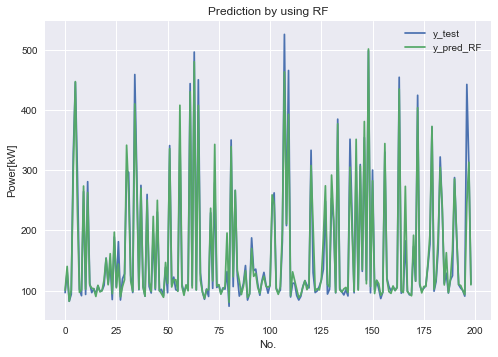

Text(0, 0.5, 'y_pred_RF')

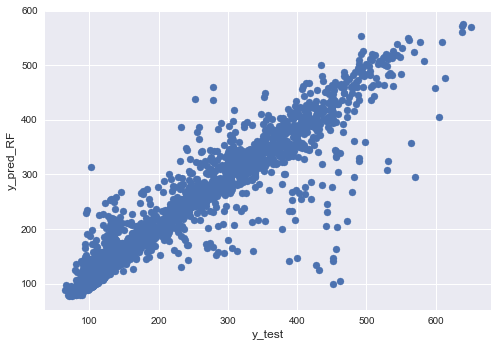

In [49]:
plt.plot(y_test[1:200],label = 'y_test')
plt.plot(y_pred_RF[1:200],label = 'y_pred_RF')
plt.legend()
plt.xlabel('No.')
plt.ylabel('Power[kW]')
plt.title('Prediction by using RF')
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('y_test',fontsize=12)
plt.ylabel('y_pred_RF',fontsize=12)

## Perfomance metrics

In [50]:
#Evaluate errors
from sklearn import  metrics

MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

15.136424905849786 1087.9281180142914 32.98375536554762
